In [2]:
# Newton–Raphson vs gradient descent vs binary-search methods to compute square roots
# Objective: if I give you a real number N, compute sqrt(N) without built-in function
# A simple but good example to understand some key concepts of Machine Learning

In [3]:
# Two cost functions (= objective to minimize) and three derived gradients are compared

# --- L2 loss ---
J2 = lambda x, N : (x**2 - N)**2      # cost function J (L2 norm)
f2 = lambda x, N : 2*(2*x)*(x**2 - N) # grad(J[x])
df2 = lambda x, N : 8*x**2 + 4*N      # hessian(J[x])

# --- L2 loss with truncated gradient ---
# If J(x, N) = (x**2 - N)**2, then we compute grad(J) but ignore the term 4*x, we get f:
f = lambda x, N : x**2 - N            # actually only concern about x!=0 roots
df = lambda x, N : 2*x

# --- L1 loss ---
J1 = lambda x, N : abs(x**2 - N)      # cost function J (L1 norm)
f1 = lambda x, N : 2*x if (x**2 - N)>0 else -2*x
df1 = lambda x, N : 2 if (x**2 - N)>0 else -2

In [4]:
# --- NEWTON ---
# Newton's method tries to find a point x satisfying f'(x) = 0. Here f is monoton
# If J(x) is a cost function, consider f(x) = J'(x). Useful if J''(x) easy to compute:
# x += H^-1 * grad[J(x)]
# if cost J(x), then: minimizing J => find root of J'(x)=f(x)
# Relevant since we are able to easily compute J''(x) = f'(x) = 2*x  (e.g. truncated-L2)

# - works perfectly with L2 (~6 iterations). Also with truncated L2 gradient (~2 iter)
# - find 0 with L1 since delta(x)= f(x)/df(x) = 2*x/2 = x. Hence x=0 (solution of y = 2*x = 0)
def compute_sqrt_newton(N, num_iter=100):
    x = N / 2                    # initial candidate
    for _ in range(num_iter):    # could be a while on the delta with condition on precision
        # tangent equation (Taylor's 1 order expansion):
        # y = f(x) = f(x0) + (x-x0)*f'(x0) should be set 0 (intersect y=0 axis)
        # it can be seen as gradient descent to find flat point of J (with f=grad(J))
        x -= f2(x, N)/df2(x, N)
    return x

In [5]:
# --- GRADIENT DESCENT ---
# - works well with L2 (lr = 0.01). Also with truncated L2 gradient
# - but oscillates for raw L1 (reason below). Momentum cannot save it properly
#  -- the issue with L1 is that gradient is constant
#  -- not getting to 0 at flat points hence not able to reduce the step size altough close to it
#  -- solution is to schudle a lr decay: lr *= 0.99 works perfectly
def compute_sqrt_gradient_descent(N, num_iter=500):
    x = N / 2
    lr = 0.1
    # b = 0.6                                    # momentum
    # v_pre = 0                                  # momentum
    for _ in range(num_iter):
        # v_new = v_pre * b + (1-b) * f1(x, N)   # momentum
        # x -= lr * v_new                        # momentum
        # v_pre = v_new                          # momentum
        x -= lr * f(x, N)
        # lr = lr * 0.99                         # L1
    return x

In [6]:
# --- BINARY SEARCH ---
def compute_sqrt_binary(N, num_iter=100):
    high = N / 2
    low = 0
    mean = (high + low) / 2
    for _ in range(num_iter):
        mean = (high + low) / 2
        if (mean ** 2) > N:
            high = mean
        else:
            low = mean
    return mean

In [7]:
# --- RESULTS ---
import math
n = 10
truth = math.sqrt(n)
print("newton = {}".format(compute_sqrt_newton(n) - truth))
print("gradient_descent = {}".format(compute_sqrt_gradient_descent(n) - truth))
print("binary = {}".format(compute_sqrt_binary(n) - truth))

newton = 0.0
gradient_descent = 0.0
binary = -4.440892098500626e-16


In [ ]:
# --- SIDE NOTES ---

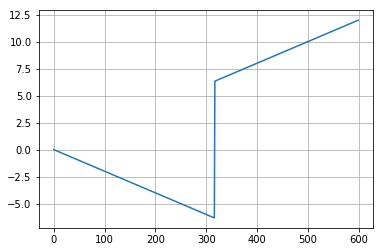

In [10]:
# gradient of J1 = |x**2-N| is non differentiable.
# - hence no gradient descent possible with a constant learning rate
# - moreover Newton finds directly x = 0 as zero of f
import numpy as np
import matplotlib.pyplot as plt
plt.plot(list(map(lambda x:2*x if (x**2 - 10)>0 else -2*x, np.arange(0, 6., 0.01))))
plt.grid()

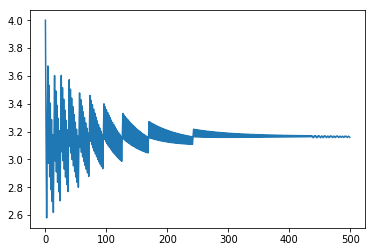

In [230]:
# Gradient descent on L1 with decayed learning rate
# plt.plot(x_list) # add a logger x_list.append(x) in the loop

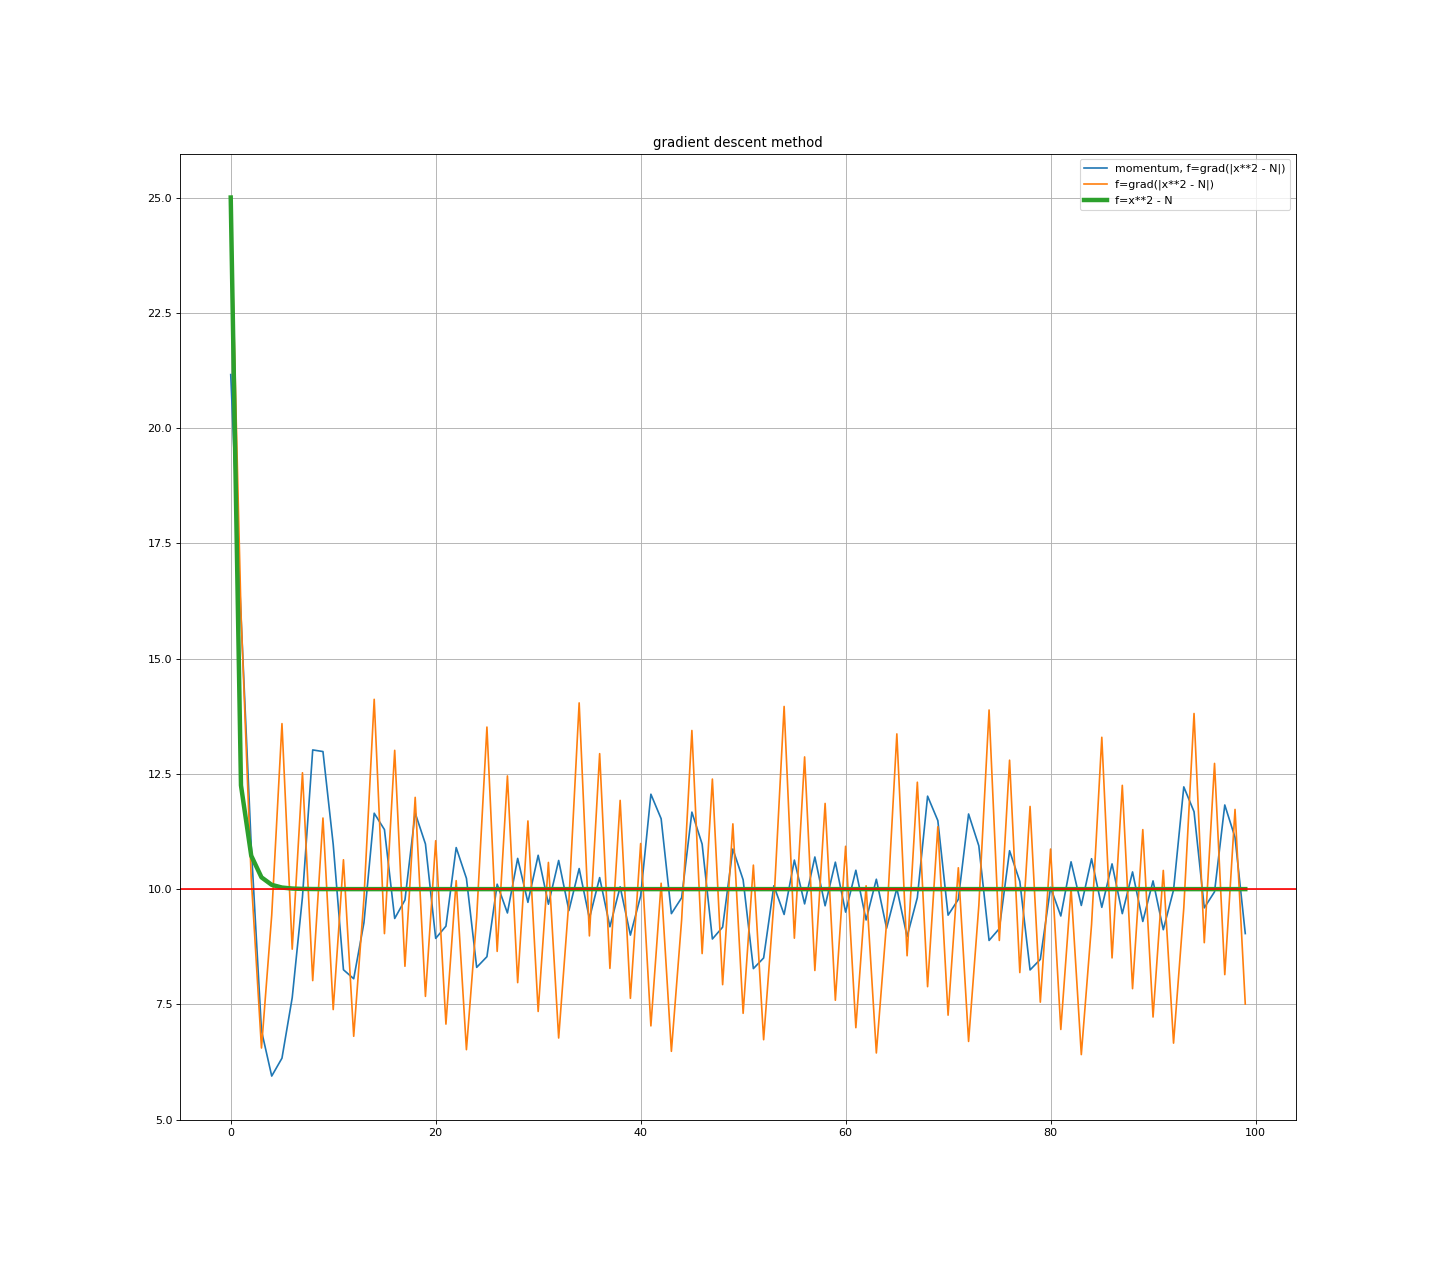

In [1]:
# momentum alone has difficulties in helping convergence
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')
plt.title("gradient descent method")
plt.plot(list(map(lambda x:x**2, x_list)), label="momentum, f=grad(|x**2 - N|)")
plt.plot(list(map(lambda x:x**2, x_list1)), label="f=grad(|x**2 - N|)")
plt.plot(list(map(lambda x:x**2, x_list2)), linewidth=4, label="f=x**2 - N")
plt.axhline(y=10, c="r")
plt.legend()
plt.grid()
# plt.savefig("gradient_method.png")